# Доклеим к wallets_features данные о пользователе

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [25]:
CUTOFF = 40
addr_tx_df = pd.read_csv("../dataset/Elliptic++ Dataset/AddrTx_edgelist.csv")
tx_info = pd.read_csv("../dataset/Elliptic++ Dataset/txs_features.csv")[["txId", "Time step"]]

addr_to_ts = addr_tx_df \
    .merge(
        tx_info,
        how="left",
        on="txId"
    ) \
    .rename(columns={"input_address": "addrId"})
addr_to_ts

train_split = addr_to_ts[
    (addr_to_ts["Time step"] <= CUTOFF)
    & ~(addr_to_ts["addrId"].isin(addr_to_ts[ addr_to_ts["Time step"] > CUTOFF ]["addrId"]))
]
train_split.shape, train_split["addrId"].nunique(), addr_to_ts["addrId"].nunique()

test_split = addr_to_ts[
    (addr_to_ts["Time step"] > CUTOFF) &
    # (~addr_to_ts["addrId"].isin(train_split["addrId"]))
    ~(addr_to_ts["addrId"].isin(addr_to_ts[ addr_to_ts["Time step"] <= CUTOFF ]["addrId"]))
]
test_split.shape, test_split["addrId"].nunique(), addr_to_ts["addrId"].nunique()

((96591, 3), 91630, 400212)

In [26]:
addr_to_ts[addr_to_ts["addrId"].isin(test_split["addrId"])]["Time step"].min()

41

In [27]:
wallets_features = pd.read_csv("../dataset/custom/wallets_features_aggregated.csv")

In [28]:
train_dataset = wallets_features[wallets_features["addrId"].isin(train_split["addrId"])]
test_dataset = wallets_features[wallets_features["addrId"].isin(test_split["addrId"])]

In [29]:
train_dataset[train_dataset["addrId"].isin(test_dataset["addrId"])].shape

(0, 46)

In [30]:
train_dataset.to_csv("../dataset/custom/train_test_split/wallets_features_aggregated__train.csv", index=False)
test_dataset.to_csv("../dataset/custom/train_test_split/wallets_features_aggregated__test.csv", index=False)

In [31]:
train_dataset.head()

,class,num_timesteps_appeared_in,fees_median,num_addr_transacted_multiple,addrId,userId,user_ts_fees_share_mean,user_ts_fees_share_min,user_ts_fees_share_max,user_addr_cnt,...,btc_sent_min,btc_received_min,fees_min,transacted_w_address_min,btc_transacted_max,btc_sent_max,btc_received_max,fees_max,last_block_appeared_in,transacted_w_address_max
1653,1,1.0,0.000037,0.0,1LUwMvFBLBpofVFmFpZE6GLu2Bt6dmE9t3,509812,0.101106,0.101106,0.101106,1,...,0.00000,0.0,0.000037,1.0,0.17695,0.07725,0.17695,0.000217,433546.0,1.0
1654,1,1.0,0.000040,0.0,17fuBJ5qquYF6VTX8n19t9yccp95vWEVME,331400,0.194991,0.194991,0.194991,4,...,0.00026,0.0,0.000040,1.0,0.00026,0.00026,0.00000,0.000040,395236.0,1.0
1655,1,1.0,0.000040,0.0,1CQ77ewS2smh8aBP3pahuVEt67ga3YWvL9,331400,0.194991,0.194991,0.194991,4,...,0.00200,0.0,0.000040,1.0,0.00200,0.00200,0.00000,0.000040,395236.0,1.0
1656,1,1.0,0.000040,0.0,1EhTXo5svU9SJvk6ZvmKnFQwVDo6a5tKH2,331400,0.194991,0.194991,0.194991,4,...,0.00220,0.0,0.000040,1.0,0.00220,0.00220,0.00000,0.000040,395236.0,1.0
1657,1,1.0,0.000040,0.0,1GP4t8rAiZJ7wAcYZLL8f5sm9vdvUU9tUu,331400,0.194991,0.194991,0.194991,4,...,0.00178,0.0,0.000040,1.0,0.00178,0.00178,0.00000,0.000040,395236.0,1.0


<Axes: title={'center': 'Adresses number - Licit + illicit'}, xlabel='btc_received_total', ylabel='Probability'>

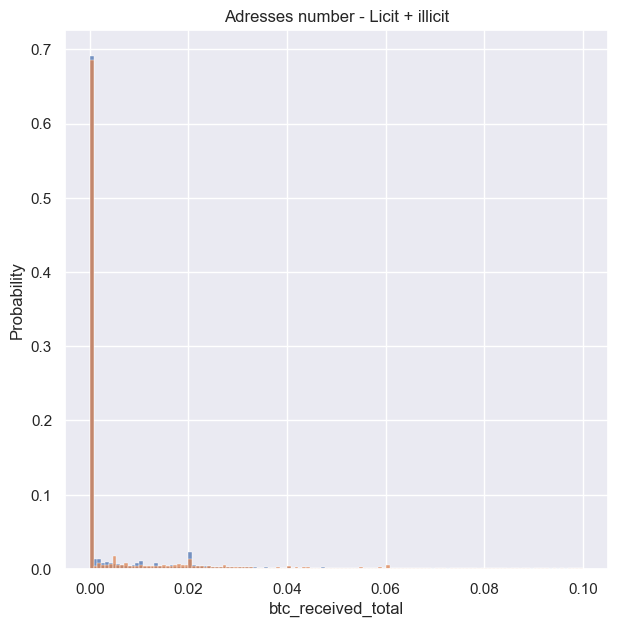

In [42]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

sns.histplot(
    train_dataset[train_dataset["btc_received_total"] < 0.1]["btc_received_total"],
    ax=ax,
    bins=130,
    stat="probability"
)
ax.set_title("Adresses number - Licit + illicit")
# ax.set_yscale("log")
# ax[0].set_xbound((0,100))

sns.histplot(
    test_dataset[test_dataset["btc_received_total"] < 0.1]["btc_received_total"],
    ax=ax,
    bins=130,
    stat="probability"
)


<Axes: title={'center': 'Adresses number - Licit + illicit'}, xlabel='fees_max', ylabel='Probability'>

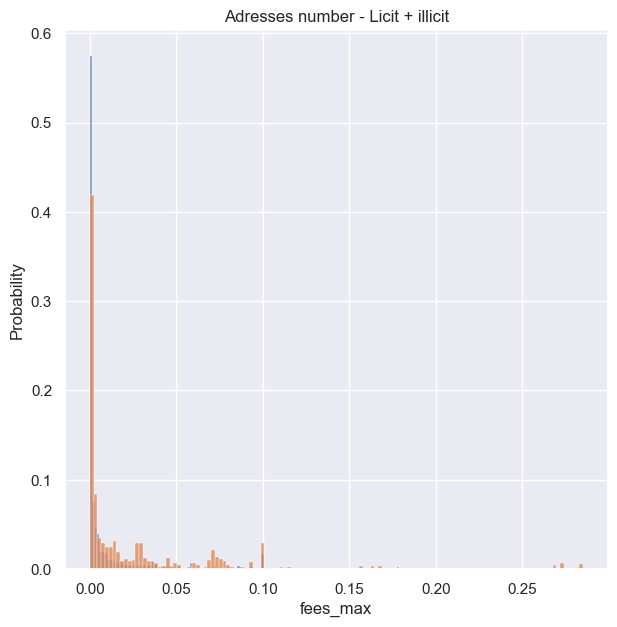

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

sns.histplot(
    train_dataset[train_dataset["fees_max"] < 10]["fees_max"],
    ax=ax,
    bins=130,
    stat="probability"
)
ax.set_title("Adresses number - Licit + illicit")
# ax.set_yscale("log")
# ax[0].set_xbound((0,100))

sns.histplot(
    test_dataset[test_dataset["fees_max"] < 10]["fees_max"],
    ax=ax,
    bins=130,
    stat="probability"
)
